In [1]:
import cv2
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Metodo de identificacion de la pupila mediante los centros de esclerotica
### - Se utiliza el metodo del espectro HSV para definir la zona blanca de la esclerotica
### - Se identifca el lado izquierdo y derecho de la esclorotica ,  se calcula los centros de masa de partes de la escleroticas ,se promedia el centro de masas y es el centro d ela pupila

## Identificando donde esta ubicado la cara

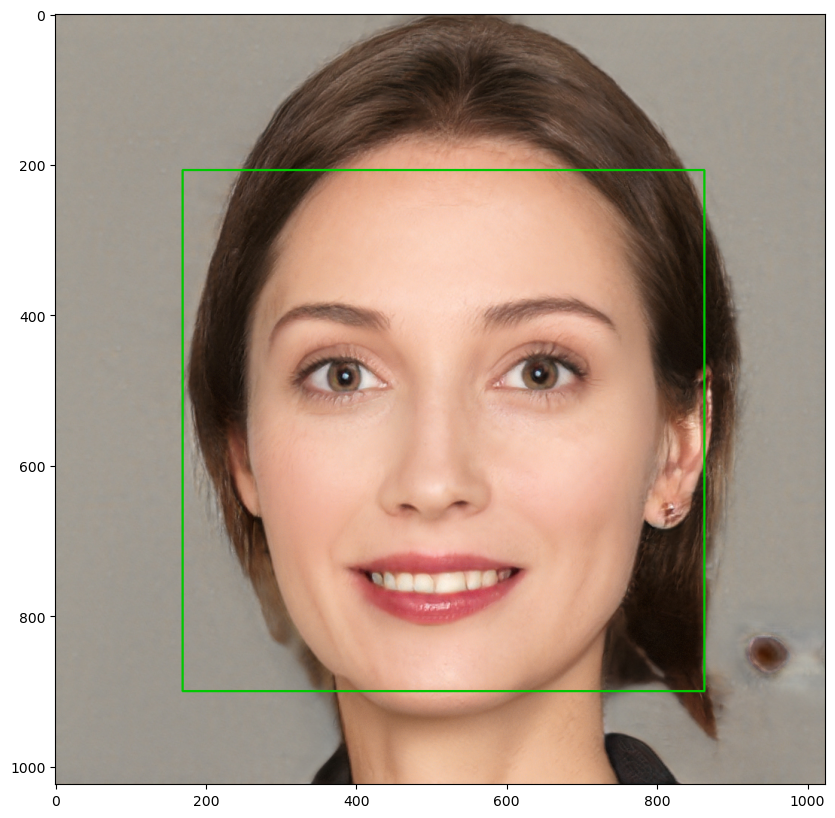

In [2]:
Clasifica_Cara = cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_frontalface_default.xml")
Clasifica_Ojos = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye_tree_eyeglasses.xml')
Imagen = cv2.imread('../PDITARRAGA/099739.jpg')
Filas,Columnas,Canales=Imagen.shape
Min_SizeFila=round(0.1*Filas)
Min_SizeCol=round(0.1*Columnas)
Max_SizeFila=round(0.6*Filas)
Max_SizeCol=round(0.6*Columnas)
imag_gray = cv2.cvtColor(Imagen, cv2.COLOR_BGR2GRAY)
Detecta_cara = Clasifica_Cara.detectMultiScale(imag_gray, 1.1, 5)
## Se obtenie los limites de la cara
cordx=Detecta_cara[0,0] # corrdenadas de columnas
cordy=Detecta_cara[0,1]
ancho_cara=Detecta_cara[0,2]
largo_cara=Detecta_cara[0,3]
image_cuadro=cv2.rectangle(Imagen,(cordx,cordy),(cordx+ancho_cara,cordy+largo_cara),(0,200,0),2)
#
rgb_img = cv2.cvtColor(Imagen, cv2.COLOR_BGR2RGB)
## Definicion de tamanos
plt.figure(figsize = (20,10))
plt.imshow(rgb_img)

## Definiendo la ubicacion de los ojos

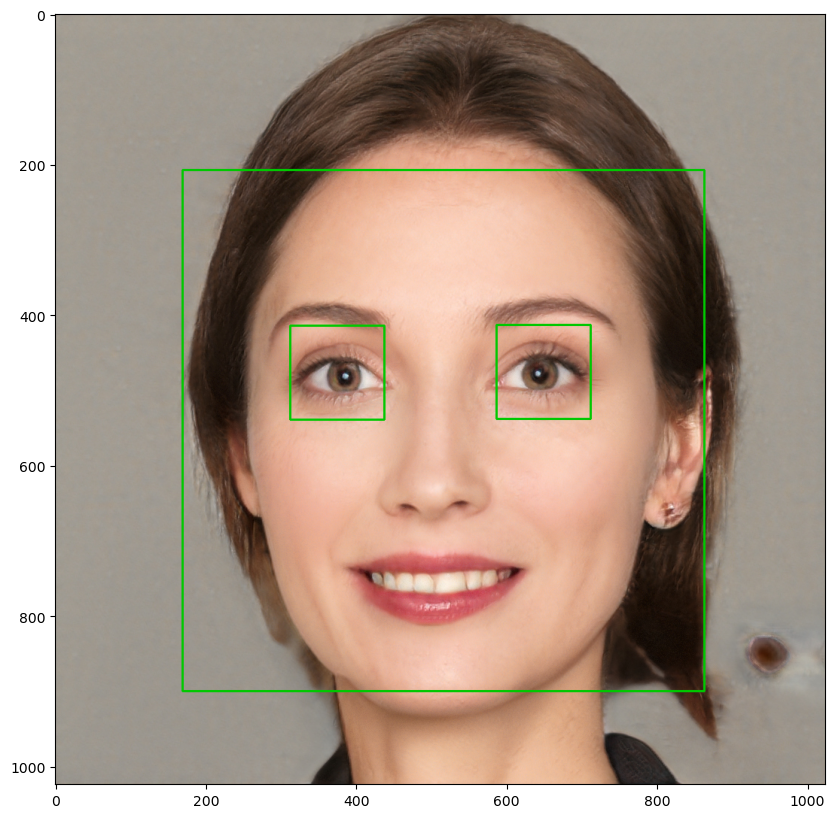

In [3]:
sector_ojos=round(largo_cara/2)
Cuadro_cara=Imagen[cordy:cordy+sector_ojos,cordx:cordx+ancho_cara] 
Cara_Gray=cv2.cvtColor(Cuadro_cara, cv2.COLOR_BGR2GRAY)
Ojos = Clasifica_Ojos.detectMultiScale(Cara_Gray)
# Coordenadas del primer ojo
Ojo1cordx=Ojos[0,0] # corrdenadas de columnas
Ojo1cordy=Ojos[0,1]
ancho_ojo1=Ojos[0,2]
largo_ojo1=Ojos[0,3]
x0_ojo1=cordx+Ojo1cordx
y0_ojo1=cordy+Ojo1cordy
ojo1=cv2.rectangle(Imagen,(x0_ojo1,y0_ojo1),(x0_ojo1+ancho_ojo1,y0_ojo1+largo_ojo1),(0,200,0),2)
rgb_img = cv2.cvtColor(Imagen, cv2.COLOR_BGR2RGB)
# corrdenadas segundo ojo
Ojo2cordx=Ojos[1,0] 
Ojo2cordy=Ojos[1,1]
ancho_ojo2=Ojos[1,2]
largo_ojo2=Ojos[1,3]
ojo2=cv2.rectangle(Imagen,(cordx+Ojo2cordx,cordy+Ojo2cordy),(cordx+Ojo2cordx+ancho_ojo2,cordy+Ojo2cordy+largo_ojo2),(0,200,0),2)
rgb_img = cv2.cvtColor(Imagen, cv2.COLOR_BGR2RGB)
## Definicion de tamanos
plt.figure(figsize = (20,10))
plt.imshow(rgb_img)

## Ahora se busca objetivamente dentro de los ojos
### Ojo izquierdo (Ojo1)

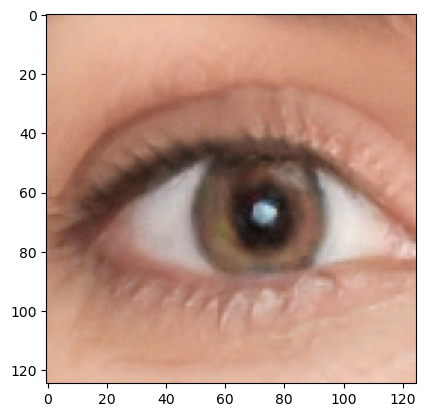

In [4]:
Imagen_Ojo = cv2.imread('../PDITARRAGA/099739.jpg')
rgb_img2 = cv2.cvtColor(Imagen_Ojo, cv2.COLOR_BGR2RGB)
## Definicion de tamanos
cuadro_ojo1=rgb_img2[y0_ojo1:y0_ojo1+ancho_ojo1,x0_ojo1:x0_ojo1+largo_ojo1]

plt.imshow(cuadro_ojo1)

7


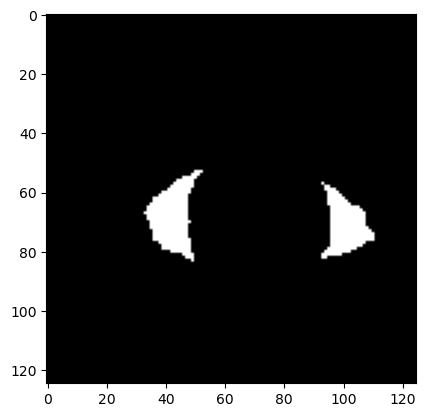

In [5]:
BlancoBajo = np.array([0, 0, 0], np.uint8)
BlancoAlto = np.array([255, 40, 255], np.uint8)
frameHSV = cv2.cvtColor(cuadro_ojo1, cv2.COLOR_BGR2HSV)
maskBlanco = cv2.inRange(frameHSV, BlancoBajo,BlancoAlto)
## Encontrando los contornos
contornos,_ = cv2.findContours(maskBlanco, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) ## Bordes externos,
contornos = sorted(contornos, key=cv2.contourArea, reverse=True)
#cv2.drawContours(frame, contornos, -1, (255,0,0), 3)
maskcontornos = cv2.drawContours(maskBlanco, contornos, -1, (0,255,75), 2)
print(len(contornos))
plt.imshow(maskcontornos, cmap=plt.cm.gray)

In [6]:
coord_x=np.zeros(1)
coord_y=np.zeros(1)
print("vecto",coord_x)
for j in range(len(contornos)):
    cnt=contornos[j]
    area = cv2.contourArea(cnt) 
    if area > 50:
        M = cv2.moments(cnt)
        if M['m00'] != 0:
            cx= int(M['m10']/M['m00'])
            cy= int(M['m01']/M['m00'])
            coord_x=np.insert(coord_x,0,cx)
            coord_y=np.insert(coord_y,0,cy)
            print(f"x: {cx } y: {cy } z:{area }")
            print(coord_x,coord_y)

vecto [0.]
x: 42 y: 68 z:465.5
[42.  0.] [68.  0.]
x: 100 y: 70 z:388.5
[100.  42.   0.] [70. 68.  0.]


71 69


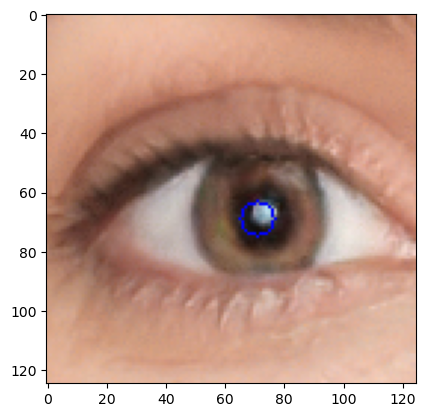

In [7]:
xcent_ojo1=round((coord_x[0]+coord_x[1])/2)
ycent_ojo1=round((coord_y[0]+coord_y[1])/2)
print(xcent_ojo1,ycent_ojo1)
imgWC = cv2.circle(cuadro_ojo1,(xcent_ojo1,ycent_ojo1),6,(0,0,255))
#plt.figure(figsize = (20,10))
plt.imshow(imgWC)